## Basic Graphing with matplotlib
* Line Graph
* Histogram
* Scatter Plot

### Libraries we will be using 
* pep 8 (style guide for Python) suggests these should be in alphabetical order

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal as norm
from scipy.stats import norm

### Initialization of variable for simulating security price

In [107]:
r = .0525
T = 1/252
sigma = .30
aapl = 177
prices = list()

### Simulation of one possible price path for an arbitrary quarter

In [101]:
# reset before running 2-d list
for day in range(63):
    prices.append(aapl)
    aapl *= np.exp((r - .5 * sigma ** 2)* T + sigma * np.sqrt(T) * norm(0,1))

### The plot method takes one or two variables and generates a line plot
* there are a long list of methods to augment and annotate your plots
* The semicolon surpresses entraneous output in the notebook setting 

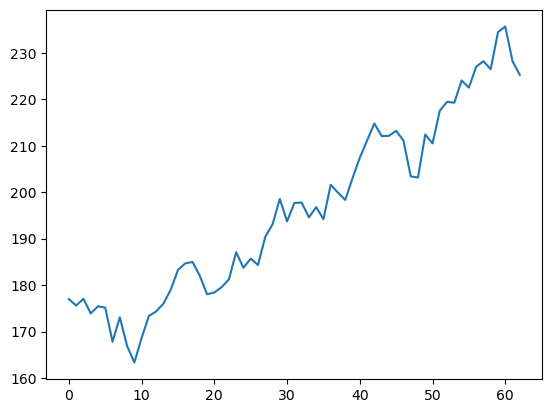

In [102]:
plt.plot(prices);

### Simulation of 5000 possible paths
* reset the price variable before running

In [ ]:
for path in range(5000):
    aapl = 177
    prices.append([])
    for day in range(63):
        prices[path].append(aapl)
        aapl *= np.exp((r - .5 * sigma ** 2)* T + sigma * np.sqrt(T) * norm(0,1))

### Plot the first 10 paths
* as you can see it is easy to plot many lines on the same graph
* everyt time you use `plt.` it effects the current plot

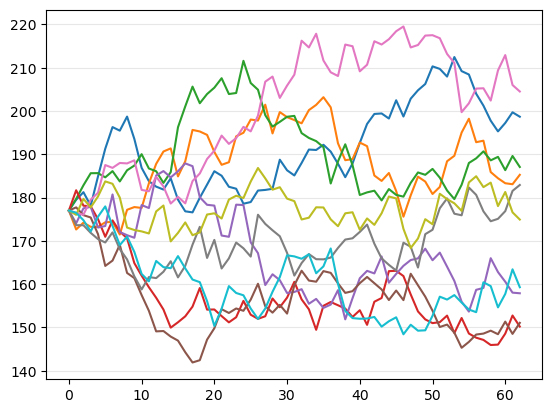

In [109]:
for line in range(10):
    plt.plot(prices[line])
plt.grid(axis='y', alpha = .3)    

### Peel off the last value in each path and store in a new variable

In [89]:
data = list()
for row in range(5000):
    data.append(prices[row][-1])

### Let's make a histogram of each path's ending price!
* plot data
* overlay a theoretical normal curve based on scipy normal model to see how the data fits
* Since a stocks price in the future generally reflects a lognormal ditribution, the overlay is more open-ended on the left

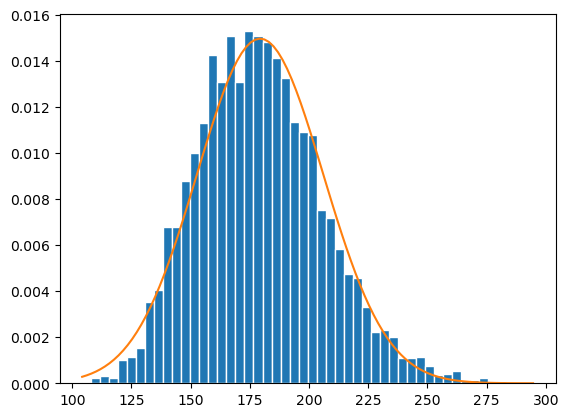

In [156]:
plt.hist(data, bins=50, density = True, edgecolor='w');
x = np.linspace(min(data),max(data),100)
mean, std = norm.fit(data)
pdf = norm.pdf(x,mean, std)
plt.plot(x,pdf)

### Using Seaborn to generate a simple histogram
* the kde (kernel density estimate) is not quite the thing as the previous normal overlay

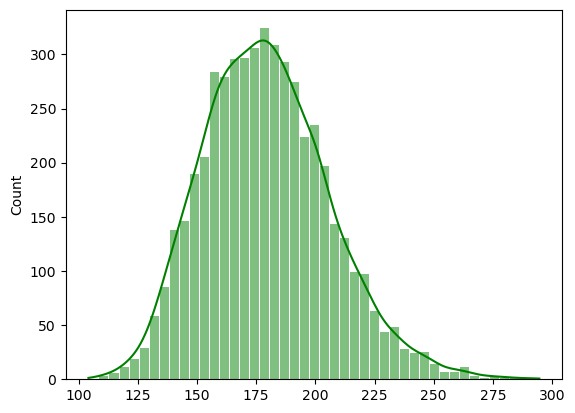

In [136]:
import seaborn as sb
# kernel density estimate
sb.histplot(data, kde=True, edgecolor='w', color='green');

In [163]:
### Scatter Plots

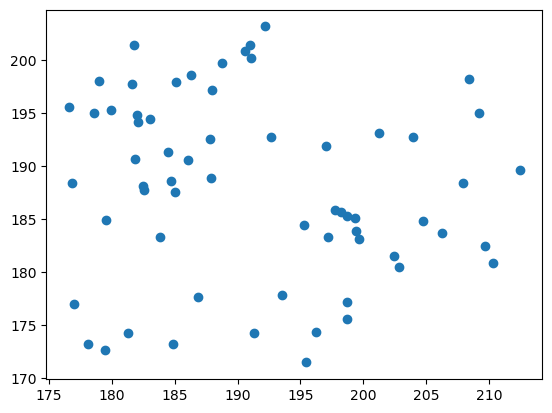

In [118]:
plt.scatter(prices[0], prices[1])

### Using NumPy to fit a simple regression model 

In [113]:
ols = np.polyfit(prices[0], prices[1], deg =1)

### Assign the output of the model to appropriate variables

In [121]:
slope, intercept = ols
x = np.array(prices[0])
y = np.array(prices[1])

### Plot the original data and least squares (regression) line 

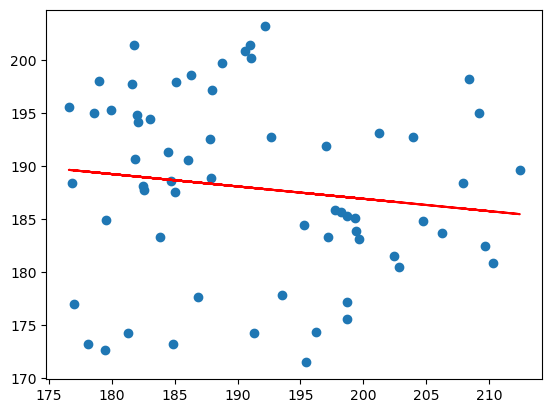

In [123]:
plt.scatter(x, y)
plt.plot(x, intercept + x*slope, color='r')

### When generating random numbers it is sometime preferable to generate a constant stream
* This can be done by creating a default generator 
* Often this is referred to as the random seed

In [140]:
rng = np.random.default_rng(3)
rng.normal(10)

12.040919121385183

### There is a so-called object-oriented method of using matplotlib
* This involves assigning variables for two matplotlib objects
* These variables are commonly called fig and ax or axes
* This methodology may allow greater control over your output
* There are syntactic differences when using this method

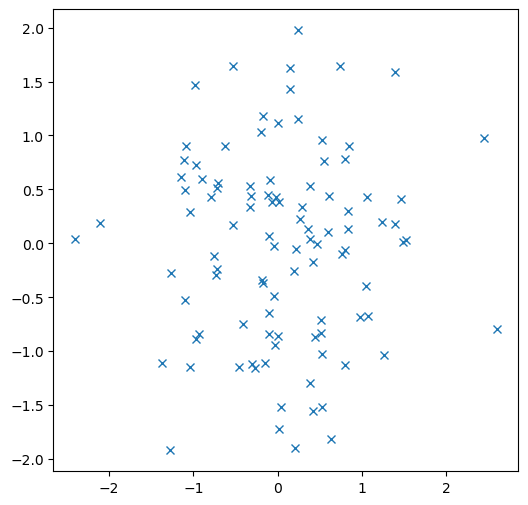

In [153]:
fig, ax = plt.subplots(figsize=(6,6))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x,y, 'x');

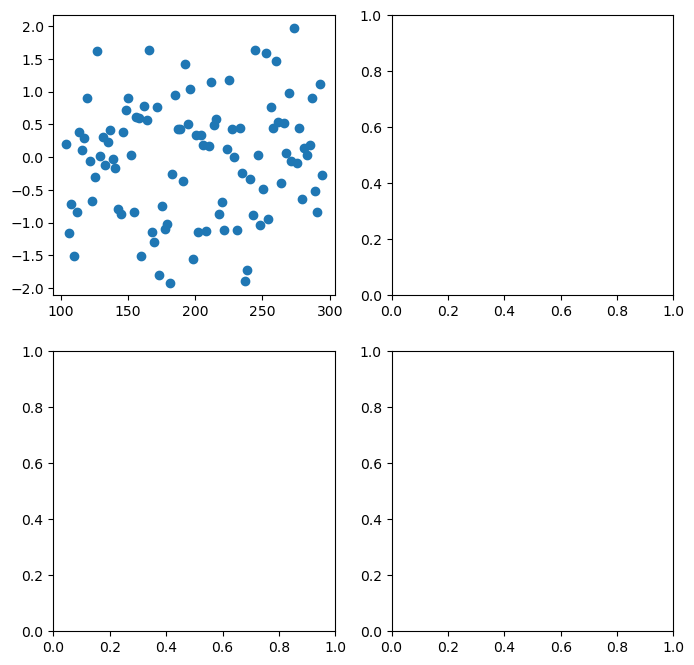

In [161]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes[0,0].plot(x,y, 'o')

### Your work can be saved out to typical image formats (.png, .jpg)

In [ ]:
fig.savefig([filename])